## Chapter 12 Decompose Time Series Data

Time series decomposition involves thinking of a series as a combination of **level, trend, seasonality**, and noise components.

In [5]:
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

#### Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.
- Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including **level, trend, seasonality**, and one non-systematic component called **noise**. These components are defined as follows:
- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series. 
- Noise: The random variation in the series.


#### Combining Time Series Components

A series is thought to be an aggregate or combination of these four components. *All series have a level and noise. The trend and seasonality components are optional*. It is helpful to think of the components as combining either additively or multiplicatively.

##### 1. Additive Model

An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

##### 2. Multiplicative Model

A multiplicative model suggests that the components are multiplied together as follows:

y(t) = Level × Trend × Seasonality × Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A nonlinear seasonality has an increasing or decreasing frequency and/or amplitude over time.




#### Automatic Time Series Decomposition

The Statsmodels library pro- vides an implementation of the naive, or classical, decomposition method in a function called seasonal decompose(). It requires that you specify whether the model is additive or multi- plicative.

The seasonal decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition:
- observed: This is the original time series data that was input into the function.
- trend: This component represents the underlying trend in the data, showing whether the series is generally increasing, decreasing, or staying constant over time.
- seasonal: This component captures the repeating patterns or cycles in the data that occur at regular intervals (e.g., daily, monthly, yearly).
- resid (residuals): This is the remaining part of the time series after the trend and seasonal components have been removed. It represents the irregular or random variations in the data, also referred to as noise.

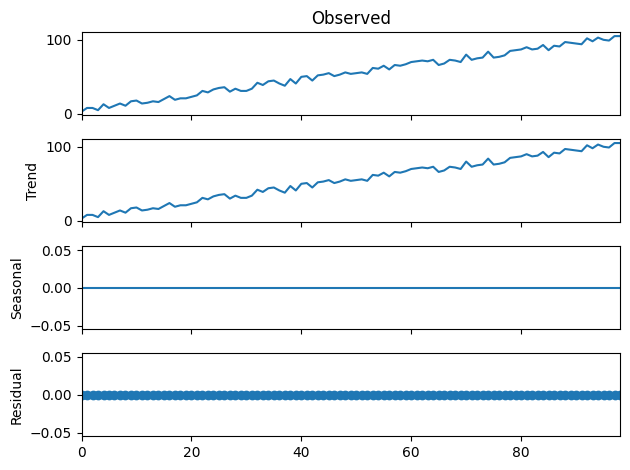

In [7]:
# additive decompose a contrived additive time series
series = [i + randrange(10) for i in range(1, 100)]
result = seasonal_decompose(series, model='additive', period=1) # due to contrived data, specify the observation frequency to be 1
result.plot()
plt.show()

We can see that the entire series was taken as the trend component and that there was no seasonality. We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

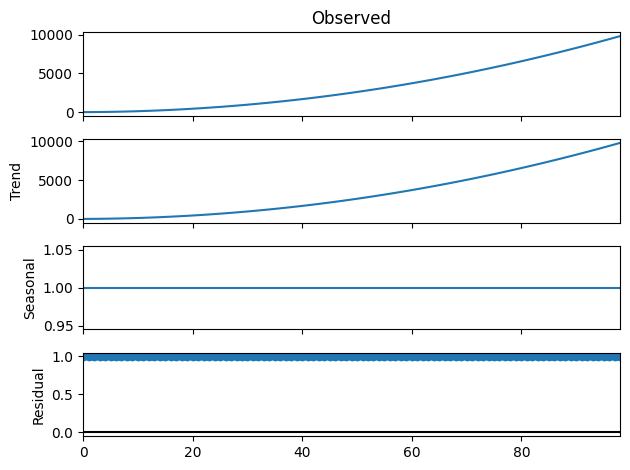

In [8]:
# multiplicative decompose a contrived multiplicative time series
series = [i ** 2.0 for i in range(1, 100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
plt.show()

We can see that, as in the additive case, the trend is easily extracted and wholly characterizes the time series.

Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

#### Airline Passengers Dataset

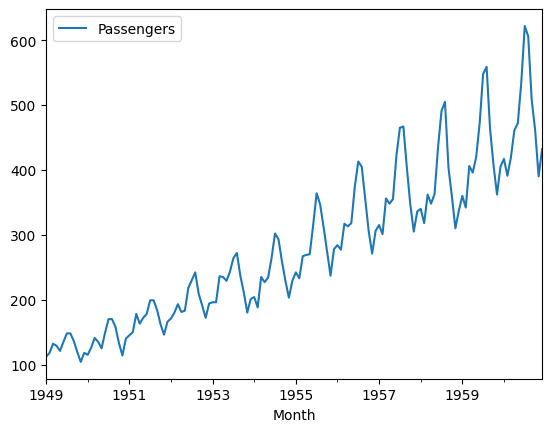

In [9]:
series = pd.read_csv('data/airline-passengers.csv', index_col=0, parse_dates=True)
series.plot()
plt.show()

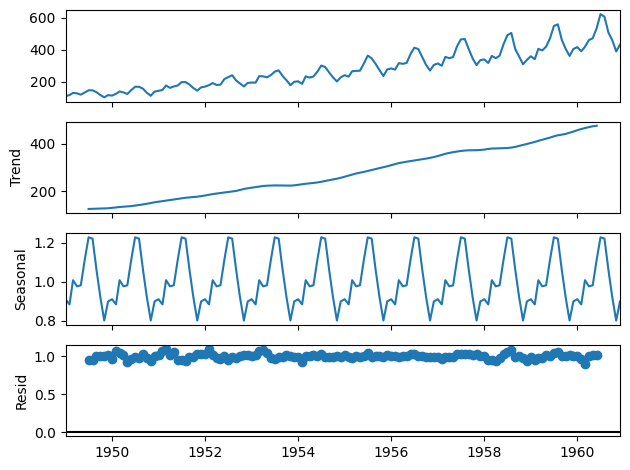

In [10]:
# multiplicative decompose time series
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability in the early and later years of the series.